In [1]:
import pandas as pd
import re, unicodedata
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from matplotlib import pyplot as plt
from typing import Counter

from collections import OrderedDict

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load the All of the Data

In [2]:
# Baca dataset
df = pd.read_csv('data.csv', encoding='latin-1')
df_kamus = pd.read_csv('new_kamusalay.csv', encoding='latin-1')
df_abuse = pd.read_csv('abusive.csv', encoding='latin-1')

### Cleaning the Data ###

In [3]:
# Inisialisasi stemmer sekali
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk membersihkan teks
def clean_text(text):
  processed_text = preprocess_text(text)
  # cleaned_words  = clean_text_with_sastrawi(processed_text)
  cleaned_text   = ''.join(processed_text)
  processed_text = preprocess_text(cleaned_text)

  return processed_text

# Fungsi untuk preprocess teks
def preprocess_text(text):

  punctuation = re.compile(r'[^\w\s]')
  pattern     = re.compile(r'\bUser\b', re.IGNORECASE)
  pattern2     = re.compile(r'\bYg\b', re.IGNORECASE)

  text = text.lower()  # Lowercase
  text = re.sub(r'[^\x00-\x7F]+', '', text)  
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8') 
  text = re.sub(r'\W+', ' ', text)  
  text = re.sub(r'\b[\d\\]+\b', ' ', text)  
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)  
  text = re.sub(punctuation, r'', text)  
  text = re.sub(pattern, r'', text)  
  text = re.sub(pattern2, r'', text)  

  return text


In [4]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Contoh penggunaan
df.duplicated(subset=['Tweet']).sum()
df.isna().sum()
df.drop_duplicates(subset=['Tweet'], inplace=True)
df.dropna(subset=['Tweet'], inplace=True)

# Bersihkan teks dengan apply (gunakan fungsi yang sudah dioptimalkan)
df['Tweet'] = df['Tweet'].apply(lambda text: clean_text(text))

In [6]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,rt siapa yang telat ngasih tau elu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku n nku tau matamu sipit tapi dilia...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor lu sekate a...,1,1,1,0,0,0,1,0,0,1,0,0
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
13166,hati hati bisu g n nlagi bosan huft xf x f x ...,0,0,0,0,0,0,0,0,0,0,0,0
13167,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0


### Stemming and Stop Words

In [7]:
def clean_text_with_sastrawi(text):
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()

  df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
  df.head()
  stemmed_text = stemmer.stem(text)

  return stemmed_text


factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0
1,rt siapa telat ngasih tau elu edan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berfikir aku tetap percaya tuhan ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku aku n nku tau matamu sipit diliat mana ...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya awa...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor lu sekate an...,1,1,1,0,0,0,1,0,0,1,0,0
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
13166,hati hati bisu g n nlagi bosan huft xf x f x xaa,0,0,0,0,0,0,0,0,0,0,0,0
13167,bom real mudah terdeteksi bom terkubur suatu...,0,0,0,0,0,0,0,0,0,0,0,0


### Menghitung jumlah kata yang mengandung Abusive Words dan Mencetak Kata Tersebut

In [8]:
abusive_words = df_abuse.iloc[:, 0].tolist()

# Fungsi untuk menghitung kata-kata kasar dalam sebuah tweet
def count_abusive_words(text):
  count = 0
  words = text.lower().split()
  for word in words:
    if word in abusive_words:
      count += 1

  return count

# Menambahkan kolom baru untuk menghitung jumlah kata-kata kasar dalam setiap tweet
df['Abusive_Count'] = df['Tweet'].apply(count_abusive_words)

In [9]:
abusive_words = df_abuse.iloc[:, 0].tolist()

# Fungsi untuk mencetak kata-kata kasar dalam sebuah tweet
def extract_abusive_words(text):
    words = text.lower().split()
    abusive_found = [word for word in words if word in abusive_words]
    return ' '.join(abusive_found)

# Menerapkan fungsi pada kolom 'Tweet' dan mencetak hasilnya
df['Abusive_Words'] = df['Tweet'].apply(extract_abusive_words)

In [10]:
def has_abusive_word(tweet):
    words = re.findall(r'\w+', tweet.lower())  # Tokenize and convert to lowercase
    return any(word in abusive_words for word in words)

df['Abusive'] = df['Abusive_Words'].apply(lambda x: 1 if pd.notna(x) and has_abusive_word(x) else 0)
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Abusive_Count,Abusive_Words
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,1,bego
1,rt siapa telat ngasih tau elu edan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,2,edan sarap
2,kadang aku berfikir aku tetap percaya tuhan ...,0,0,0,0,0,0,0,0,0,0,0,0,0,
3,aku aku n nku tau matamu sipit diliat mana ...,0,1,0,0,0,0,0,0,0,0,0,0,1,sipit
4,kaum cebong kapir udah keliatan dongoknya awa...,1,1,0,1,1,0,0,0,0,0,1,0,2,cebong dongok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor lu sekate an...,1,1,1,0,0,0,1,0,0,1,0,0,1,congor
13165,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,1,kunyuk
13166,hati hati bisu g n nlagi bosan huft xf x f x xaa,0,1,0,0,0,0,0,0,0,0,0,0,1,bisu
13167,bom real mudah terdeteksi bom terkubur suatu...,0,0,0,0,0,0,0,0,0,0,0,0,0,


In [11]:
my_data = df.drop(columns=['Tweet', 'Abusive', 'Abusive_Count', 'Abusive_Words'])
my_data.corr()

,HS,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
HS,1.000000,0.712792,0.494115,0.296159,0.248335,0.185298,0.180478,0.736107,0.686221,0.452175,0.226516
HS_Individual,0.712792,1.000000,-0.257572,0.032914,-0.000212,0.213017,0.183284,0.636830,0.962723,-0.235710,0.059599
HS_Group,0.494115,-0.257572,1.000000,0.367208,0.342384,-0.008769,0.021446,0.224718,-0.247971,0.915121,0.238186
HS_Religion,0.296159,0.032914,0.367208,1.000000,0.095460,-0.004652,0.025117,-0.159432,0.032457,0.347092,0.082270
HS_Race,0.248335,-0.000212,0.342384,0.095460,1.000000,-0.028763,-0.020244,-0.133686,-0.006894,0.238033,0.244239
HS_Physical,0.185298,0.213017,-0.008769,-0.004652,-0.028763,1.000000,0.051332,-0.099752,0.219955,0.000746,-0.025375
HS_Gender,0.180478,0.183284,0.021446,0.025117,-0.020244,0.051332,1.000000,-0.097157,0.190654,0.028144,-0.018984
HS_Other,0.736107,0.636830,0.224718,-0.159432,-0.133686,-0.099752,-0.097157,1.000000,0.605649,0.225429,0.125275
HS_Weak,0.686221,0.962723,-0.247971,0.032457,-0.006894,0.219955,0.190654,0.605649,1.000000,-0.226923,-0.113677
HS_Moderate,0.452175,-0.235710,0.915121,0.347092,0.238033,0.000746,0.028144,0.225429,-0.226923,1.000000,-0.074906


In [12]:
df.groupby('Abusive')[['HS_Gender', 'HS']].count()

,HS_Gender,HS
Abusive,,
0,6423,6423
1,6600,6600


### Mencari Label yang paling sering muncul di Tweet

In [13]:
label_columns = my_data  # Assuming the first two columns are not labels

# Sum the values of each label
label_sums = my_data.sum().sort_values(ascending=False)

# Find the label with the highest sum
most_common_label = label_sums.idxmax()
most_common_label_count = label_sums.max()

print(f"The label with the most occurrences of '1' is '{most_common_label}' with {most_common_label_count} occurrences.")


The label with the most occurrences of '1' is 'HS' with 5501 occurrences.


In [14]:
label_sums

HS               5501
HS_Other         3696
HS_Individual    3528
HS_Weak          3336
HS_Group         1973
HS_Moderate      1694
HS_Religion       785
HS_Race           562
HS_Strong         471
HS_Physical       319
HS_Gender         303
dtype: int64

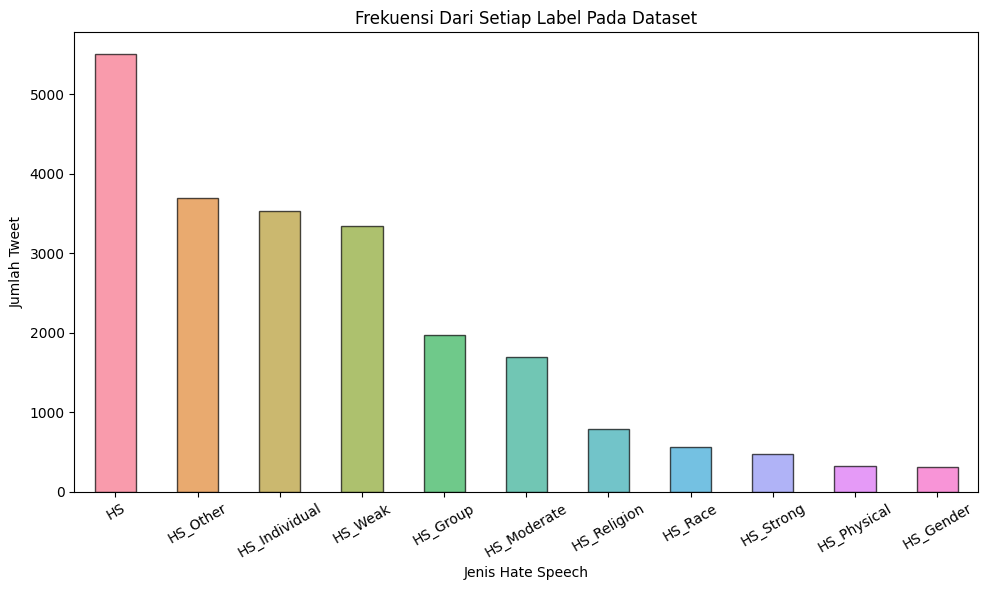

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan label_sums adalah Series
plt.figure(figsize=(10, 6))

# Menggunakan seaborn untuk mendapatkan palet warna yang berbeda
num_colors = len(label_sums)  # Jumlah warna sesuai dengan jumlah elemen di label_sums
colors = sns.color_palette("husl", n_colors=num_colors)

# Plot bar chart dengan warna berbeda untuk setiap bar
label_sums.plot(kind='bar', color=colors, alpha=0.7, edgecolor='black')

plt.title('Frekuensi Dari Setiap Label Pada Dataset')
plt.xlabel('Jenis Hate Speech')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the histogram
plt.show()

### Mencari Frekuensi dari Penggunaan Abusive Words dari Label yang include ke Tweet terbanyak

In [16]:
abusive_words_df = pd.read_csv('abusive.csv')
abusive_words = set(df_abuse['ABUSIVE'])

# Memfilter Tweet berdasarkan label dengan frekuensi tertinggi
filtered_tweets = df[df[most_common_label] == 1]['Tweet']

# Tokenize tweet yang sudah difilter
words = []
for tweet in filtered_tweets:
    words.extend(re.findall(r'\w+', tweet.lower()))  # Tokenize and ubah ke lower case

# Menghitung jumlah kata abusive 
abusive_word_counts = Counter(word for word in words if word in abusive_words)

# Mencari dan mengurutkan kata abusive berdasarkan frekuensinya
sorted_abusive_words = abusive_word_counts.most_common()

print("\nUrutan Penggunaan Kata Abusive berdasarkan frekuensinya:\n")
for word, count in sorted_abusive_words:
    print(f"{word}: {count}")

# Mencari kata abusive paling sering muncul
most_common_abusive_word, most_common_abusive_word_count = abusive_word_counts.most_common(1)[0]

print(f"\nKata abusive paling sering muncul pada label '{most_common_label}' adalah kata  '{most_common_abusive_word}' dengan frekuensi {most_common_abusive_word_count}.")


Urutan Penggunaan Kata Abusive berdasarkan frekuensinya:

cebong: 496
rezim: 225
komunis: 213
kafir: 195
antek: 164
dungu: 162
kampret: 157
onta: 149
babi: 139
bani: 135
tolol: 133
goblok: 117
bacot: 95
anjing: 95
bego: 92
bajingan: 88
banci: 87
asing: 87
tai: 80
bangsat: 66
munafik: 60
bodoh: 53
picek: 53
congor: 51
cocot: 49
kunyuk: 49
sampah: 47
bong: 47
idiot: 47
gila: 46
setan: 43
sontoloyo: 43
mampus: 43
monyet: 42
keparat: 42
hina: 39
kampang: 38
bencong: 37
budek: 36
najis: 32
iblis: 32
udik: 30
kacrut: 29
kampungan: 26
bejat: 25
geblek: 25
buta: 25
cacat: 23
sarap: 23
pantat: 23
rejim: 22
sipit: 21
jamban: 20
sinting: 20
cupu: 19
jablay: 18
anjir: 17
culun: 17
jijik: 17
terkutuk: 17
pecun: 16
celeng: 16
lgbt: 16
gembel: 15
kontol: 15
dongok: 13
perek: 13
homo: 12
bangkai: 12
alay: 12
edan: 11
modar: 11
taplak: 9
memek: 9
silit: 8
lengser: 8
sompret: 8
burik: 8
ateis: 7
jancuk: 7
ngentot: 6
berak: 6
bisu: 6
bokep: 5
nista: 5
autis: 5
serbet: 5
titit: 5
gay: 5
transgender: 4
ba

C:\Users\USER\AppData\Local\Temp\ipykernel_16544\869930267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


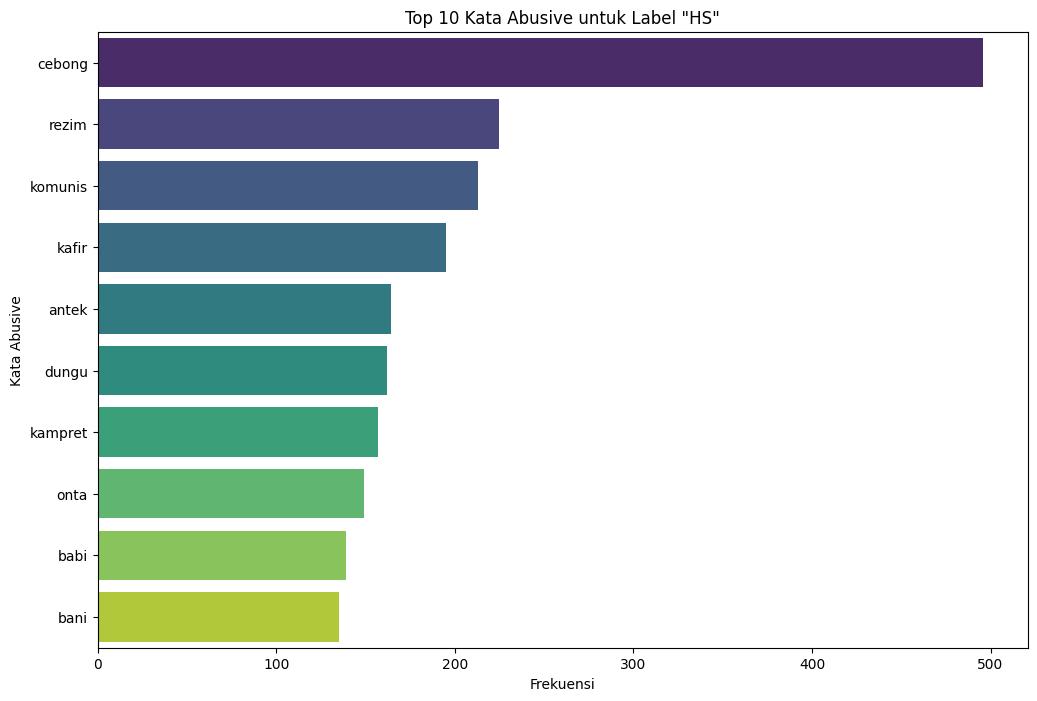

In [17]:
top_n = 10
top_abusive_words = sorted_abusive_words[:top_n]
words, counts = zip(*top_abusive_words)

plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.xlabel('Frekuensi')
plt.ylabel('Kata Abusive')
plt.title(f'Top {top_n} Kata Abusive untuk Label "{most_common_label}"')
plt.show()

In [18]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'left')

In [19]:
cebong_tweets = df[df.Tweet.str.contains('cebong', case=False)]  # Case-insensitive search

cebong_tweets['Tweet'].head(20)


4                                                                                                                                             kaum cebong kapir udah keliatan dongoknya  awal tambah dongok  hahahah
29                                                                                                                                                      mah sdh nenek nenek sy heran sama cebong biasay bohong terus
55     provokasi mayat politisasi agama penyebab kekalahan pilkada dki beginilah cara cebong mendeskripsikan kekalahan junjungannya fyi ahog blm pernah ikut pemilihan apapun kec jd wakil   bukanlah etnis mayorita
89                                                                                                                                                                                  cebong bang  merasa paling benar
102                                                                  goblog   bani cebong tukang tipu penjilat penguasa ketahuan gerakin masa dibaya

In [20]:
# Menyimpan DataFrame ke file CSV
cebong_tweets.to_csv('output.csv', index=False)

# Menyimpan DataFrame ke file Excel
cebong_tweets.to_excel('output.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
from collections import Counter

# Asumsikan 'cebong_tweets' berisi tweet yang telah diproses dan mengandung 'cebong'

# Hitung frekuensi kata (menggunakan Counter)
word_counts = Counter()
for tweet in cebong_tweets['Tweet']:
    words = tweet.split()  # Pisahkan teks menjadi kata-kata
    for word in words:
        if word != 'cebong':
            word_counts[word] += 1

# Urutkan hitungan kata dan identifikasi N kata yang paling sering muncul
sorted_counts = word_counts.most_common(20)  # Ambil 20 kata paling sering muncul

# Ekstrak hanya kata-katanya (tanpa hitungan)
top_20_words = [word for word, _ in sorted_counts]

top_20_words


['x',
 'f',
 'xf',
 'n',
 'gak',
 'kampret',
 'aja',
 'dungu',
 'otak',
 'jadi',
 'mana',
 'lo',
 'sama',
 'nya',
 'dasar',
 'goblok',
 'lu',
 'ga',
 'si',
 'cuma']